## DETERMINING WHICH NEIGHBORHOOD IN THE WASHIGNTON TO PLACE A BILLBOARD FOR A NEW RESTAURANT COMPANY

#### IBM Applied Data Science Capstone 

### 1. INTRODUCTION

Washington is the second most populous state on the West Coast. Also, It is a very diverse city.

As quoted in an article by small businesses - Advertising's Effects on Demand
"Advertising plays an important role in increasing and decreasing demand for a product or service. It's a way to engage consumers and educate them about the business, product or service and results. If the advertising is targeting the audience segment correctly, then the effects on demand will likely be positive. However, if the advertising misses the mark, the effects on the business can be devastating. Advertising can affect both the demand for a particular product or service, and the demand within a particular audience segment."

Undoubtedly, Business with good advertising easily flourish is an of an ethnically diverse city. The idea of this project is to categorically segment the neighborhoods(towns) of Washington into major clusters to advice a new restaurant chains share holders on where to set-up advertising on their new online restaurant.  A desirable intention is to examine the neighborhood cluster's food habits. Further examination might reveal the neighborhoods food preference to help the company draft targeted menus.

This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.
Stakeholders would be the one who are interested to use this quantifiable analysis to decide the distribution of advertising over "the most visited city on the US - Washington". 

### 2. DATA

#### To examine the above said, following data sources will be used:

##### i. Washington DC DATA SET


##### Link: http://www.geonames.org/US/WA/largest-cities-in-washington.html'
##### Description: This Washington DC data set is a web resource data set. That includes data on the ten largest cities in Washington DC.  This data set will provide the addresses of neighborhood of NYC in HTML format. 


##### ii. Foursquare API:


##### Link: https://developer.foursquare.com/docs
##### Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to Foursquare Venue Category Hierarchy. Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. 

### 3. METHODOLOGY

##### IMPORT LIBRARIES 


In [1]:
import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.3       |     pyhb0f4dca_0          86 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py36h5fab9bb_0         141 KB  conda-forge
    soupsieve-2.0.1            |             py_1          30 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/noarch:

In [2]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          99 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0



geographiclib-1.52   | 35 KB     | ############################

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    entrypoints-0.3            |  pyhd8ed1ab_1003           8 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    jsonschema-3.2.0           |     pyhd8ed1ab_3        

#### Download and Explore Washington Dataset

##### In order to segment the neighborhoods(towns) of Washington DC, a dataset is required that contains the towns, that exist with respective latitude and longitude coordinates.

##### This dataset exists for free on the web. Here is the link

##### To the dataset: http://www.geonames.org/US/WA/largest-cities-in-washington.html

##### Beautiful soup will be utilized to extract data from the web

In [4]:
data = requests.get('http://www.geonames.org/US/WA/largest-cities-in-washington.html').text

In [5]:
soup = BeautifulSoup(data, 'html.parser')

##### Transforming the data into a pandas data frame

In [6]:
# Scrape the internet for data on washignton DC Cities
wash_data = 'http://www.geonames.org/US/WA/largest-cities-in-washington.html'
# More concise method than requests and Beautiful soup
dataframe_list = pd.read_html(wash_data, flavor='bs4')
df_raw = dataframe_list[1]
df_raw

,Unnamed: 0,Name,Population,Latitude/Longitude
0,1,Seattle,684451,47.606 / -122.332
1,2,Spokane,213272,47.66 / -117.429
2,3,Tacoma,207948,47.253 / -122.444
3,4,Vancouver,172860,45.639 / -122.661
4,5,Bellevue,139820,47.61 / -122.201
5,6,Kent,126952,47.381 / -122.235
6,7,Everett,108010,47.979 / -122.202
7,8,Renton,100242,47.483 / -122.217
8,9,Federal Way,95171,47.322 / -122.313
9,10,Spokane Valley,94919,47.673 / -117.239


In [7]:
wash_cities = df_raw[['Name','Population','Latitude/Longitude']]
wash_cities

,Name,Population,Latitude/Longitude
0,Seattle,684451,47.606 / -122.332
1,Spokane,213272,47.66 / -117.429
2,Tacoma,207948,47.253 / -122.444
3,Vancouver,172860,45.639 / -122.661
4,Bellevue,139820,47.61 / -122.201
5,Kent,126952,47.381 / -122.235
6,Everett,108010,47.979 / -122.202
7,Renton,100242,47.483 / -122.217
8,Federal Way,95171,47.322 / -122.313
9,Spokane Valley,94919,47.673 / -117.239


In [8]:
# new data frame from cities in washignton with split value columns
new = wash_cities["Latitude/Longitude"].str.split("/", n = 1, expand = True)
  
# making separate first name column from new data frame
wash_cities["Latitude"]= new[0]
  
# making separate last name column from new data frame
wash_cities["Longitude"]= new[1]
  
# Dropping old Name(Latitude/Longitude) columns
wash_cities.drop(columns =["Latitude/Longitude"], inplace = True)
  
# data frame display
wash_cities


,Name,Population,Latitude,Longitude
0,Seattle,684451,47.606,-122.332
1,Spokane,213272,47.66,-117.429
2,Tacoma,207948,47.253,-122.444
3,Vancouver,172860,45.639,-122.661
4,Bellevue,139820,47.61,-122.201
5,Kent,126952,47.381,-122.235
6,Everett,108010,47.979,-122.202
7,Renton,100242,47.483,-122.217
8,Federal Way,95171,47.322,-122.313
9,Spokane Valley,94919,47.673,-117.239


In [9]:
# Transforming Latitude and Longitude values into Numeric Values
wash_cities['Latitude'] = pd.to_numeric(wash_cities['Latitude'])
wash_cities['Longitude'] = pd.to_numeric(wash_cities['Longitude'])


In [10]:
# Confirming Data type
wash_cities.dtypes

Name           object
Population      int64
Latitude      float64
Longitude     float64
dtype: object

#### Create a map of the world with refrence to Washington DC with neighborhoods(Towns) superimposed on top

In [11]:
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of Beer User percent
for i in range(len(wash_cities)):
        lat = wash_cities.iloc[i]['Latitude']
        long = wash_cities.iloc[i]['Longitude']
        radius=5
        popup_text = """City : {}<br>
                    %of Population : {}<br>"""
        popup_text = popup_text.format(wash_cities.loc[i]['Name'],wash_cities.iloc[i]['Population']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

##### Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the town and its respective population.

#### Define Foursquare Credentials and Version

##### Utilizing the Foursquare API to explore the neighborhoods(Towns) and segment them.

In [12]:
CLIENT_ID = 'EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5' # your Foursquare ID
CLIENT_SECRET = 'PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5
CLIENT_SECRET:PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA


#### Fetch Foursquare Venue Category Hierarchy

In [36]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [37]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 16373


In [38]:
category_list = category_results['response']['categories']

In [39]:
len(category_list)

10

In [40]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


#### Food & It's Sub-Categories

##### Function to return a dictionary with Ids' & Names of Food & It's Sub-Categories.

In [137]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [42]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

##### Explore the first neighborhood to understand the results of GET Request

#### Get the neighborhood's name

In [46]:
wash_cities.loc[0, 'Name']

'Seattle'

##### Get the neighborhood's latitude and longitude values.

In [138]:
Seattle_latitude = wash_cities.loc[0, 'Latitude'] # neighborhood latitude value
Seattle_longitude = wash_cities.loc[0, 'Longitude'] # neighborhood longitude value

Seattle_name = wash_cities.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Seattle_name, 
                                                               Seattle_latitude, 
                                                               Seattle_longitude))

Latitude and longitude values of Seattle are 47.606, -122.33200000000001.


##### Now, let's get the Food that is in Wakefield within a radius of 500 meters.

###### Create the GET request URL to search for Venue with requested Category ID

In [139]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=EPIK0X2OM30OHN3PMMIKPBDBCXISRGGETGTZPA0PJFBZQ3E5&client_secret=PD0ZPCXVFI4Q5Q34DX52RZSZKRLFK2CBST0CO5TA1TZUJ2PA&v=20180605&ll=47.606,-122.33200000000001&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

#### Send the GET request and examine the resutls

In [141]:
results = requests.get(url).json()

In [142]:
results['response']['venues']

[{'id': '595c813b95da0c5ce07ed6f8',
  'name': "Ivar's Fish Bar",
  'location': {'address': '1001 Alaskan Way',
   'lat': 47.60394816181504,
   'lng': -122.33871108055381,
   'labeledLatLngs': [{'label': 'display',
     'lat': 47.60394816181504,
     'lng': -122.33871108055381}],
   'distance': 553,
   'postalCode': '98104',
   'cc': 'US',
   'city': 'Seattle',
   'state': 'WA',
   'country': 'United States',
   'formattedAddress': ['1001 Alaskan Way',
    'Seattle, WA 98104',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1ce941735',
    'name': 'Seafood Restaurant',
    'pluralName': 'Seafood Restaurants',
    'shortName': 'Seafood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '2350385',
   'url': 'https://www.grubhub.com/restaurant/ivars-pier-54-fish-bar-1001-alaskan-way-seattle/2350385?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_c

#### The category name of the venue 'Ivar's Fish Bar' is 'Food'.

###### As, our aim is to segment the neighborhoods(Towns) of Washington with respect to the Food in its vicinity. We need to proceed further to fetch this data from all the neighborhoods' venues.



###### Let's create a function to repeat the following process to all the neighborhoods in NYC:
###### Loop through neighborhoods
###### Create the API request URL with radius=500, LIMIT=100
###### Make the GET request
###### For each neighborhood, return only relevant information for each nearby venue
###### Append all nearby venues to a list
###### Unfold the list & append it to dataframe being returned

##### The categoryId parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from category_dict.

##### The above process turns out to be redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name.

In [55]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

## 3. Analysis & Machine Learning

##### Let's check the size of the resulting dataframe

In [145]:
print(wash_venues.shape)
wash_venues.head()

(242, 8)


,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Seattle,47.606,-122.332,Columbia Tower Club,47.604507,-122.330484,Social Club
1,2,Seattle,47.606,-122.332,Metropolitan Grill,47.604617,-122.334280,Steakhouse
2,3,Seattle,47.606,-122.332,Red Bowls,47.604654,-122.333211,Noodle House
3,4,Seattle,47.606,-122.332,Penelope and The Beauty Bar,47.608117,-122.333872,Spa
4,5,Seattle,47.606,-122.332,Georgian Room,47.608105,-122.334004,New American Restaurant


##### Unique categories can be curated from all the returned venues

In [146]:
print('There are {} uniques categories.'.format(len(wash_venues['Venue Category'].unique())))
wash_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 97 uniques categories.


Venue Category
Pizza Place                14
Mexican Restaurant         13
American Restaurant        13
Thai Restaurant             9
Theater                     9
                           ..
Smoke Shop                  1
Hockey Arena                1
Hobby Shop                  1
Health & Beauty Service     1
Home Service                1
Name: Venue Category, Length: 97, dtype: int64

###### As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [147]:
# list all the categories
unique_categories = wash_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Social Club, Steakhouse, Noodle House, Spa, New American Restaurant, American Restaurant, Sushi Restaurant, Concert Hall, Theater, Art Museum, Eastern European Restaurant, Gym, Pizza Place, Scenic Lookout, BBQ Joint, Thai Restaurant, Japanese Restaurant, Tour Provider, Toy / Game Store, North Indian Restaurant, Department Store, Speakeasy, Movie Theater, Fondue Restaurant, Mexican Restaurant, Electronics Store, Women's Store, Cosmetics Shop, Chinese Restaurant, Mobile Phone Shop, Shopping Mall, Brewery, Seafood Restaurant, Mediterranean Restaurant, Shoe Store, Science Museum, Italian Restaurant, Theme Park, Comedy Club, Recreation Center, Performing Arts Venue, Bank, Gay Bar, Whisky Bar, Health & Beauty Service, Vegetarian / Vegan Restaurant, Fast Food Restaurant, Salon / Barbershop, Antique Shop, Hobby Shop, Thrift / Vintage Store, Road, Yoga Studio, Chocolate Shop, Vietnamese Restaurant, Tanning Salon, Lingerie Store, Discount Store, Asian Restaurant, Cycle Studio, Jazz Club, Tattoo 

In [148]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Sporting Goods Shop, Yoga Studio, Auto Garage, Thai Restaurant, Bus Station, Pet Store, Tanning Salon, Pharmacy, Hockey Arena, Mexican Restaurant, Mattress Store, ATM, Toy / Game Store, Art Museum, Comedy Club, Video Store, Discount Store, Road, Dance Studio, Scenic Lookout, Italian Restaurant, Playground, Hardware Store, Vietnamese Restaurant, Fondue Restaurant, Women's Store, Ramen Restaurant, Seafood Restaurant, Video Game Store, Japanese Restaurant, Hobby Shop, Pizza Place, Massage Studio, Antique Shop, Casino, Social Club, Steakhouse, Stadium, Dry Cleaner, Indian Restaurant, Concert Hall, Mobile Phone Shop, Shipping Store, Performing Arts Venue, Science Museum, Fabric Shop, Department Store, Insurance Office, Health & Beauty Service, Shoe Store, Electronics Store, Gym Pool, Optical Shop, Chocolate Shop, Mediterranean Restaurant, Sushi Restaurant, Recreation Center, Salon / Barbershop, Gym, Whisky Bar, Spa, French Restaurant, Movie Theater, Jazz Club, Taco Place, American Restauran

##### Let's remove all the generalized categories, like Coffee Shop, Cafe, etc.

In [63]:
wash_venues = wash_venues[wash_venues['Venue Category'].isin(food_categories)].reset_index()
wash_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Seattle,47.606,-122.332,Columbia Tower Club,47.604507,-122.330484,Social Club
1,2,Seattle,47.606,-122.332,Metropolitan Grill,47.604617,-122.334280,Steakhouse
2,3,Seattle,47.606,-122.332,Red Bowls,47.604654,-122.333211,Noodle House
3,4,Seattle,47.606,-122.332,Penelope and The Beauty Bar,47.608117,-122.333872,Spa
4,5,Seattle,47.606,-122.332,Georgian Room,47.608105,-122.334004,New American Restaurant


In [65]:
print('There are {} unique FOOD categories.'.format(len(wash_venues['Venue Category'].unique())))

There are 97 unique FOOD categories.


##### Let's find out how many unique venues can be curated from all the returned venues

In [67]:
print('There are {} uniques venues.'.format(len(wash_venues['Venue'].unique())))

There are 224 uniques venues.


### Analyze Each Neighborhood

In [68]:
# one hot encoding
wash_onehot = pd.get_dummies(wash_venues[['Venue Category']], prefix="", prefix_sep="")
wash_onehot.head()

,ATM,American Restaurant,Antique Shop,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bank,Boutique,...,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# add neighborhood column back to dataframe
wash_onehot['Neighborhood'] = wash_venues['Neighborhood'] 
wash_onehot.head()

,ATM,American Restaurant,Antique Shop,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bank,Boutique,...,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Seattle
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Seattle
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Seattle
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Seattle
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Seattle


In [71]:
# move neighborhood column to the first column
Neighborhood = wash_onehot['Neighborhood']

wash_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
wash_onehot.insert(0, 'Neighborhood', Neighborhood)

wash_onehot.head()

,Neighborhood,ATM,American Restaurant,Antique Shop,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bank,...,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
0,Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
wash_onehot.shape

(242, 98)

##### Find out the top 10 food categories in Washington

In [73]:
venue_counts = wash_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,ATM,American Restaurant,Antique Shop,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bank,Boutique,...,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bellevue,0,1,0,0,1,0,0,0,2,1,...,0,0,0,1,0,0,1,0,0,2
Everett,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Federal Way,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Kent,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,1,0
Kirkland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
find out the top 10 food categories in NYC

In [74]:
venue_counts_described = venue_counts.describe().transpose()

In [75]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Mexican Restaurant,12.0,1.083333,1.443376,0.0,0.0,1.0,1.25,5.0
American Restaurant,12.0,1.083333,1.378954,0.0,0.0,0.5,2.00,4.0
Pizza Place,12.0,1.166667,1.403459,0.0,0.0,1.0,1.50,4.0
Theater,12.0,0.750000,1.055290,0.0,0.0,0.0,1.25,3.0
Korean Restaurant,12.0,0.250000,0.866025,0.0,0.0,0.0,0.00,3.0
Italian Restaurant,12.0,0.666667,0.984732,0.0,0.0,0.0,1.00,3.0
Fast Food Restaurant,12.0,0.666667,0.887625,0.0,0.0,0.5,1.00,3.0
Concert Hall,12.0,0.333333,0.887625,0.0,0.0,0.0,0.00,3.0
Thai Restaurant,12.0,0.750000,0.621582,0.0,0.0,1.0,1.00,2.0
Sushi Restaurant,12.0,0.583333,0.668558,0.0,0.0,0.5,1.00,2.0


In [76]:
venue_top10_list = venue_top10.index.values.tolist()

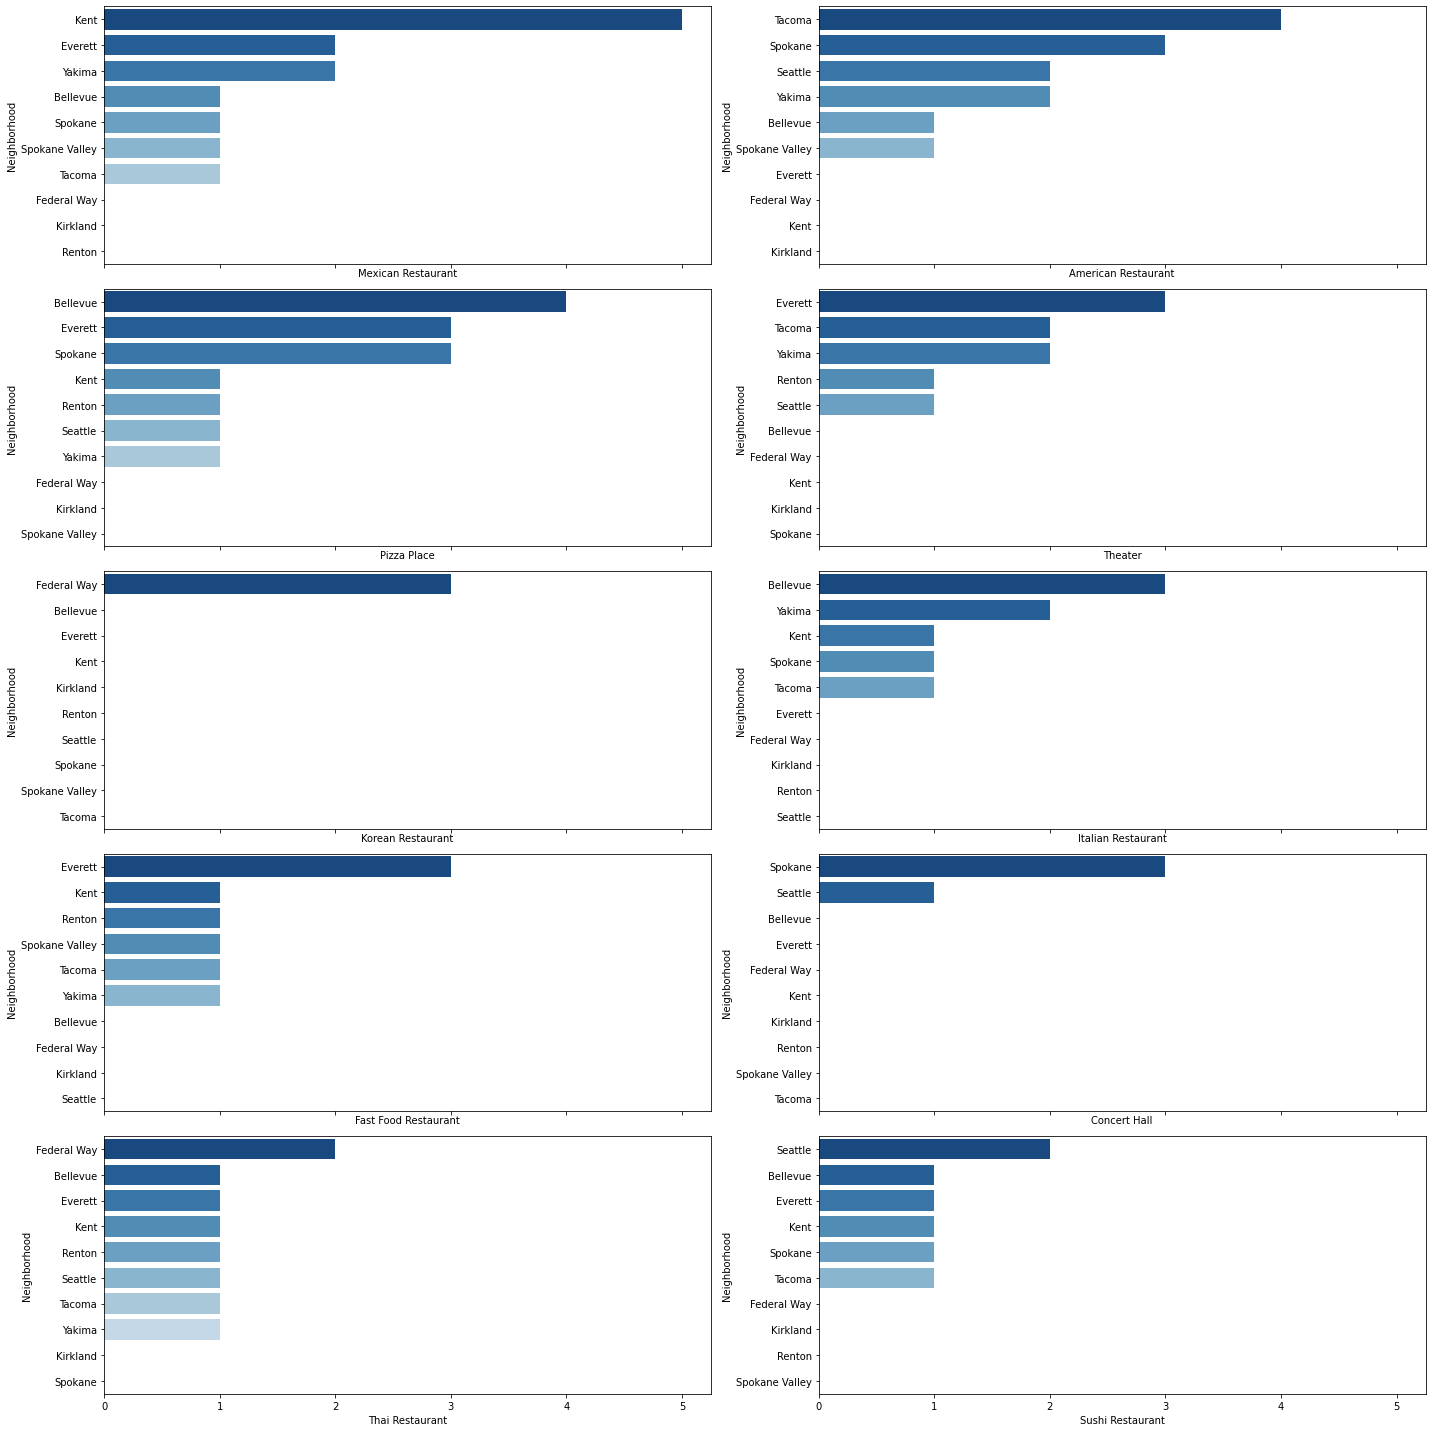

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

##### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [151]:
wash_grouped = wash_onehot.groupby('Neighborhood').mean().reset_index()
wash_grouped.head()

,Neighborhood,ATM,American Restaurant,Antique Shop,Art Museum,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bank,...,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
0,Bellevue,0.000000,0.022727,0.0,0.0,0.022727,0.000000,0.0,0.000000,0.045455,...,0.0,0.0,0.000000,0.022727,0.000000,0.0,0.022727,0.0,0.000000,0.045455
1,Everett,0.041667,0.000000,0.0,0.0,0.000000,0.041667,0.0,0.041667,0.041667,...,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,Federal Way,0.058824,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.058824,0.0,0.000000,0.000000
3,Kent,0.037037,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.074074,...,0.0,0.0,0.000000,0.000000,0.037037,0.0,0.000000,0.0,0.037037,0.000000
4,Kirkland,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


#### Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [81]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [83]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = wash_grouped['Neighborhood']

In [85]:
for ind in np.arange(wash_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wash_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House
4,Kirkland,Playground,Insurance Office,Hobby Shop,Fast Food Restaurant,Fondue Restaurant


#### CLUSTER NEIGHBORHOODS

##### Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [152]:
wash_grouped_clustering = wash_grouped.drop('Neighborhood', 1)

##### Determine the optimal number of clusters for k-means clustering

##### The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [153]:
sum_of_squared_distances = []
K = range(1,13)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(wash_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 

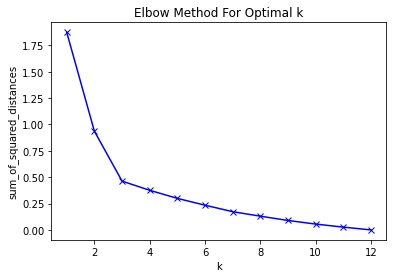

In [90]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [100]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,10)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(wash_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(wash_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 

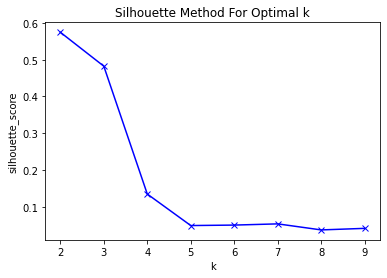

In [101]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

##### There is a peak at k = 3 and k=8. Two and four clusters will give a very broad classification of the venues.

In [155]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(wash_grouped_clustering)

print(kmeans.labels_)

[3 5 6 0 2 7 3 3 4 3 1 0]


##### Let's set number of clusters = 8

In [105]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#### Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [156]:
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop
1,6,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant
2,4,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop
3,5,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House
4,2,Kirkland,Playground,Insurance Office,Hobby Shop,Fast Food Restaurant,Fondue Restaurant


#### Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [157]:
# merge neighborhoods_venues_sorted with wash_data to add latitude/longitude for each neighborhood
wash_merged = neighborhoods_venues_sorted.join(wash_venues.set_index('Neighborhood'), on='Neighborhood')
wash_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,162,47.61,-122.201,Araya's Place,47.610242,-122.203017,Vegetarian / Vegan Restaurant
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,164,47.61,-122.201,Shakti Vinyasa Yoga,47.609970,-122.203155,Yoga Studio
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,166,47.61,-122.201,Pogacha Restaurant & Café,47.610660,-122.199308,Italian Restaurant
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,167,47.61,-122.201,Fran's Chocolates,47.610163,-122.205026,Chocolate Shop
0,3,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,168,47.61,-122.201,Mediterranean Kitchen,47.611337,-122.201727,Mediterranean Restaurant


In [158]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wash_merged['Venue Latitude'], wash_merged['Venue Longitude'], wash_merged['Neighborhood'], wash_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Results

In [164]:
required_column_indices = [2,3,7]
required_column = [list(wash_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

In [165]:
cluster_0 = wash_merged.loc[wash_merged['Cluster Labels'] == 0, wash_merged.columns[1:12]]
cluster_0.head(5)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
5,Renton,Automotive Shop,Taco Place,Noodle House,Dry Cleaner,Fast Food Restaurant,330,47.483,-122.217,Royal Orchid,47.482751
5,Renton,Automotive Shop,Taco Place,Noodle House,Dry Cleaner,Fast Food Restaurant,331,47.483,-122.217,Happy At The Bay Teriyaki,47.480856
5,Renton,Automotive Shop,Taco Place,Noodle House,Dry Cleaner,Fast Food Restaurant,332,47.483,-122.217,GameStop,47.480946
5,Renton,Automotive Shop,Taco Place,Noodle House,Dry Cleaner,Fast Food Restaurant,335,47.483,-122.217,Taco Time,47.480945
5,Renton,Automotive Shop,Taco Place,Noodle House,Dry Cleaner,Fast Food Restaurant,336,47.483,-122.217,Chick-Fil-A,47.478573


In [166]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Automotive Shop    15
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Taco Place    15
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
351    1
350    1
349    1
348    1
345    1
343    1
341    1
338    1
336    1
335    1
332    1
331    1
330    1
353    1
352    1
Name: index, dtype: int64
---------------------------------------------


In [167]:
cluster_1 = wash_merged.loc[wash_merged['Cluster Labels'] == 1, wash_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
10,Vancouver,Road,Yoga Studio,Electronics Store,Fast Food Restaurant,Fondue Restaurant,161,45.639,-122.661,I-5 South,45.634803


In [168]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Road    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Yoga Studio    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
161    1
Name: index, dtype: int64
---------------------------------------------


In [169]:
cluster_2 = wash_merged.loc[wash_merged['Cluster Labels'] == 2, wash_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
4,Kirkland,Playground,Insurance Office,Hobby Shop,Fast Food Restaurant,Fondue Restaurant,429,47.681,-122.209,Turtle Park,47.681855
4,Kirkland,Playground,Insurance Office,Hobby Shop,Fast Food Restaurant,Fondue Restaurant,430,47.681,-122.209,State Farm Insurance - Kirkland - Jeff Sand In...,47.684853


In [170]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Playground    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Insurance Office    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
430    1
429    1
Name: index, dtype: int64
---------------------------------------------


In [171]:
cluster_3 = wash_merged.loc[wash_merged['Cluster Labels'] == 3, wash_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,162,47.61,-122.201,Araya's Place,47.610242
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,164,47.61,-122.201,Shakti Vinyasa Yoga,47.609970
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,166,47.61,-122.201,Pogacha Restaurant & Café,47.610660
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,167,47.61,-122.201,Fran's Chocolates,47.610163
0,Bellevue,Pizza Place,Italian Restaurant,Chinese Restaurant,Spa,Sporting Goods Shop,168,47.61,-122.201,Mediterranean Kitchen,47.611337


In [172]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            44
Concert Hall           33
American Restaurant    26
Gym                    24
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant    57
Italian Restaurant     44
Theater                26
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
231    1
88     1
72     1
73     1
74     1
      ..
171    1
172    1
175    1
176    1
0      1
Name: index, Length: 127, dtype: int64
---------------------------------------------


In [173]:
cluster_4 = wash_merged.loc[wash_merged['Cluster Labels'] == 4, wash_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop,356,47.322,-122.313,Traditional Korean Beef Soup 전통설렁탕,47.321057
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop,357,47.322,-122.313,Indochina,47.320396
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop,360,47.322,-122.313,Great Clips,47.319444
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop,361,47.322,-122.313,U.S. Bank ATM,47.322750
2,Federal Way,Korean Restaurant,Thai Restaurant,ATM,Optical Shop,Salon / Barbershop,365,47.322,-122.313,Bangkok Garden Thai Restaurant,47.319708


In [174]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Korean Restaurant    17
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Thai Restaurant    17
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
379    1
369    1
357    1
360    1
361    1
365    1
366    1
367    1
370    1
378    1
371    1
372    1
373    1
374    1
375    1
376    1
356    1
Name: index, dtype: int64
---------------------------------------------


In [175]:
cluster_5 = wash_merged.loc[wash_merged['Cluster Labels'] == 5, wash_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House,240,47.381,-122.235,Kent Station Plaza,47.384985
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House,242,47.381,-122.235,Mod Pizza,47.384442
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House,245,47.381,-122.235,Allegro Performing Arts Academy,47.380407
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House,246,47.381,-122.235,U.S. Bank ATM,47.383336
3,Kent,Mexican Restaurant,Greek Restaurant,Bank,Pizza Place,Noodle House,247,47.381,-122.235,Wells Fargo,47.381378


In [176]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Mexican Restaurant    45
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Greek Restaurant    27
Bank                18
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
254    1
286    1
411    1
410    1
402    1
279    1
406    1
404    1
413    1
274    1
425    1
272    1
271    1
268    1
267    1
265    1
263    1
262    1
260    1
259    1
257    1
285    1
287    1
253    1
416    1
252    1
251    1
250    1
248    1
247    1
246    1
245    1
426    1
242    1
408    1
240    1
415    1
400    1
424    1
422    1
420    1
419    1
407    1
417    1
256    1
Name: index, dtype: int64
---------------------------------------------


In [177]:
cluster_6 = wash_merged.loc[wash_merged['Cluster Labels'] ==  6, wash_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant,288,47.979,-122.202,Thai Gusto,47.979275
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant,289,47.979,-122.202,Brooklyn Brothers Pizza,47.979342
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant,292,47.979,-122.202,FunkoHQ,47.980455
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant,293,47.979,-122.202,U.S. Bank ATM,47.979040
1,Everett,Fast Food Restaurant,Theater,Pizza Place,Mexican Restaurant,Sushi Restaurant,294,47.979,-122.202,Angel of the Winds Arena,47.978837


In [178]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Mexican Restaurant    45
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Greek Restaurant    27
Bank                18
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
254    1
286    1
411    1
410    1
402    1
279    1
406    1
404    1
413    1
274    1
425    1
272    1
271    1
268    1
267    1
265    1
263    1
262    1
260    1
259    1
257    1
285    1
287    1
253    1
416    1
252    1
251    1
250    1
248    1
247    1
246    1
245    1
426    1
242    1
408    1
240    1
415    1
400    1
424    1
422    1
420    1
419    1
407    1
417    1
256    1
Name: index, dtype: int64
---------------------------------------------
